In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sp
from scipy.signal import argrelextrema

## Constants

In [50]:
PI = np.pi
L = 123.5e-2 - 6.5e-2
LAMBDA = 632.8e-9

In [51]:
def sinc(x,W):
    return np.sinc(PI*W*10**-3*x/(LAMBDA*L))**2
def sinc_fitted(x,k):
    return np.sinc(PI*k*x)**2

## Plotting Intensity

[40.58114246] [1.01294059] [0.02496087]
Exp:13    -0.0235
29    -0.0155
43    -0.0085
73     0.0065
87     0.0135
103    0.0215
115    0.0275
Name: x (mm), dtype: float64
Fit:[-0.02351351 -0.01570571 -0.00783784  0.00783784  0.01570571  0.02351351]


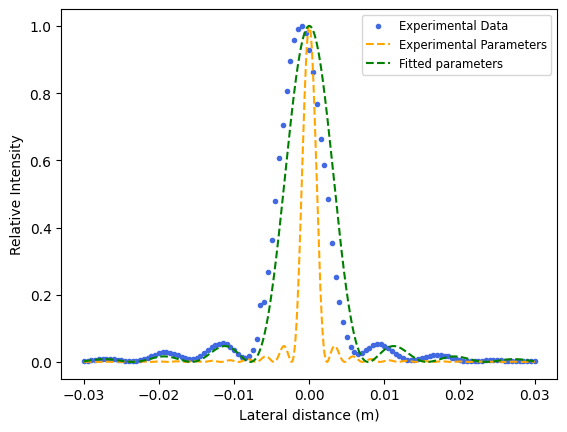

In [72]:
df = pd.read_csv('../Data/0_1mm.csv')

W = 0.1e-3

x = (df['x (mm)']/2 - 30)*10**-3
y = np.array((df['Voltage (mv)']-df['BG Voltage (mv)'][0])/(df['Voltage (mv)'].max()-df['BG Voltage (mv)'][0]))

plt.scatter(
    x,
    y,
    c='royalblue',
    marker='.',
    label = 'Experimental Data'
)

x_smooth = np.linspace(-30e-3,30e-3,1000)

plt.plot(
    x_smooth,
    sinc(x_smooth,0.1),
    c='orange',
    linestyle='--',
    label = 'Experimental Parameters'
)

param, covariance = sp.curve_fit(sinc_fitted,x,y)
y_smooth = sinc_fitted(x_smooth,*param)

perr = np.sqrt(np.diag(covariance))

print(param,perr,perr/param)

plt.plot(
    x_smooth,
    y_smooth,
    label = 'Fitted parameters',
    linestyle = '--',
    c='green'
)

# Finding minima

min_exp = argrelextrema(y,np.less,order=5)[0]
x_minexp = x[min_exp]
print(f'Exp:{x_minexp}')

min_fit = argrelextrema(y_smooth,np.less,order=5)[0]
x_minfit = x_smooth[min_fit]
print(f'Fit:{x_minfit}')

plt.legend(loc='upper right',fontsize='small')

plt.xlabel('Lateral distance (m)')
plt.ylabel('Relative Intensity')

plt.savefig('../Figures/0_1mm',bbox_inches = 'tight',pad_inches=0.1)
plt.show()

[77.52516042] [2.11866863] [0.02732879]


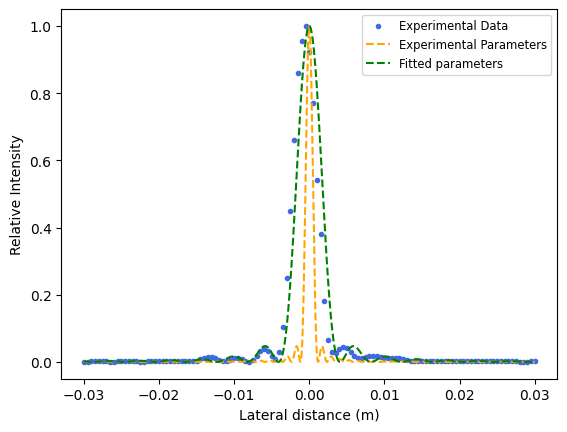

In [77]:
df = pd.read_csv('../Data/0_2mm.csv')

W = 0.2e-3

x = (df['x (mm)']/2 - 30)*10**-3
y = (df['Voltage (mv)']-1.71)/(df['Voltage (mv)'].max()-1.71)

plt.scatter(
    x,
    y,
    c='royalblue',
    marker='.',
    label = 'Experimental Data'
)

x_smooth = np.linspace(-30e-3,30e-3,1000)

plt.plot(
    x_smooth,
    sinc(x_smooth,0.2),
    c='orange',
    linestyle='--',
    label = 'Experimental Parameters'
)

param, covariance = sp.curve_fit(sinc_fitted,x,y)
y_smooth = sinc_fitted(x_smooth,*param)

perr = np.sqrt(np.diag(covariance))

print(param,perr,perr/param)

plt.plot(
    x_smooth,
    y_smooth,
    label = 'Fitted parameters',
    linestyle = '--',
    c='green'
)

plt.legend(loc='upper right',fontsize='small')

plt.xlabel('Lateral distance (m)')
plt.ylabel('Relative Intensity')

plt.savefig('../Figures/0_2mm',bbox_inches = 'tight',pad_inches=0.1)
plt.show()

[79.79466808] [7.37659511] [0.09244471]


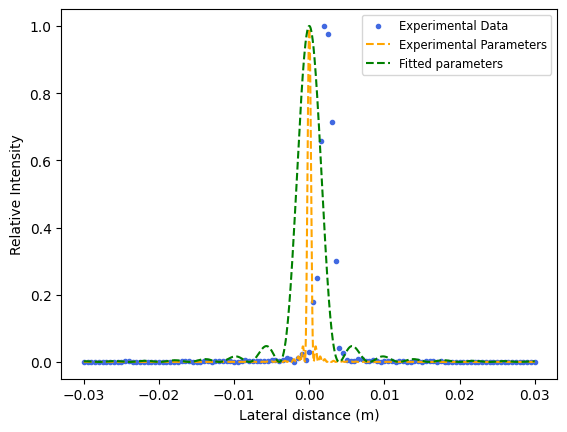

In [76]:
df = pd.read_csv('../Data/0_4mm.csv')

W = 0.4e-3

x = (df['x (mm)']/2 - 30)*10**-3
y = (df['Voltage (mv)']-1.72)/(df['Voltage (mv)'].max()-1.72)

plt.scatter(
    x,
    y,
    c='royalblue',
    marker='.',
    label = 'Experimental Data'
)

x_smooth = np.linspace(-30e-3,30e-3,1000)

plt.plot(
    x_smooth,
    sinc(x_smooth,0.4),
    c='orange',
    linestyle='--',
    label = 'Experimental Parameters'
)

param, covariance = sp.curve_fit(sinc_fitted,x,y)
y_smooth = sinc_fitted(x_smooth,*param)

perr = np.sqrt(np.diag(covariance))

print(param,perr,perr/param)

plt.plot(
    x_smooth,
    y_smooth,
    label = 'Fitted parameters',
    linestyle = '--',
    c='green'
)

plt.legend(loc='upper right',fontsize='small')

plt.xlabel('Lateral distance (m)')
plt.ylabel('Relative Intensity')

plt.savefig('../Figures/0_4mm',bbox_inches = 'tight',pad_inches=0.1)
plt.show()

[160.10110572] [0.80351749] [0.00501881]
Exp:9    -0.0037
26   -0.0020
67    0.0021
84    0.0038
Name: x (mm), dtype: float64
Fit:[-0.00397377 -0.00198458  0.00198458  0.00397377]


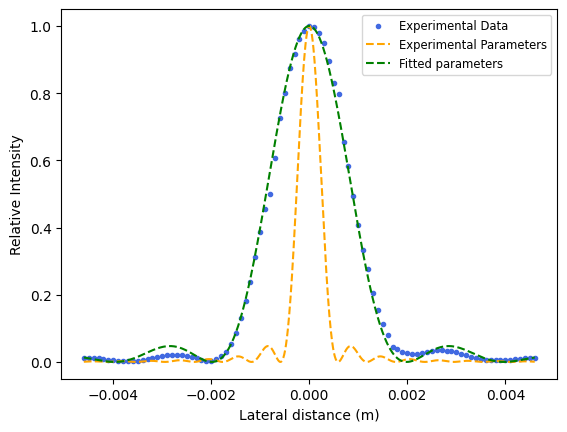

In [75]:
df = pd.read_csv('../Data/0_4mmv2.csv')

W = 0.4e-3

x = (df['x (mm)']/2-4.6)*10**-3
y = np.array(df['Voltage (mV)']/df['Voltage (mV)'].max())

plt.scatter(
    x,
    y,
    c='royalblue',
    marker='.',
    label = 'Experimental Data'
)

x_smooth = np.linspace(-4.6e-3,4.6e-3,1000)

plt.plot(
    x_smooth,
    sinc(x_smooth,0.4),
    c='orange',
    linestyle='--',
    label = 'Experimental Parameters'
)

param, covariance = sp.curve_fit(sinc_fitted,x,y)
y_smooth = sinc_fitted(x_smooth,*param)

perr = np.sqrt(np.diag(covariance))

print(param,perr,perr/param)

plt.plot(
    x_smooth,
    y_smooth,
    label = 'Fitted parameters',
    linestyle = '--',
    c='green'
)

min_exp = argrelextrema(y,np.less,order=5)[0]
x_minexp = x[min_exp]
print(f'Exp:{x_minexp}')

min_fit = argrelextrema(y_smooth,np.less,order=5)[0]
x_minfit = x_smooth[min_fit]
print(f'Fit:{x_minfit}')

plt.legend(loc='upper right',fontsize='small')

plt.xlabel('Lateral distance (m)')
plt.ylabel('Relative Intensity')

plt.savefig('../Figures/0_4mmv2',bbox_inches = 'tight',pad_inches=0.1)
plt.show()

[85.13688786] [0.29680374] [0.00348619]
Exp:22    -0.0078
62    -0.0038
138    0.0038
176    0.0076
Name: x (mm), dtype: float64
Fit:[-0.00373874  0.00373874]


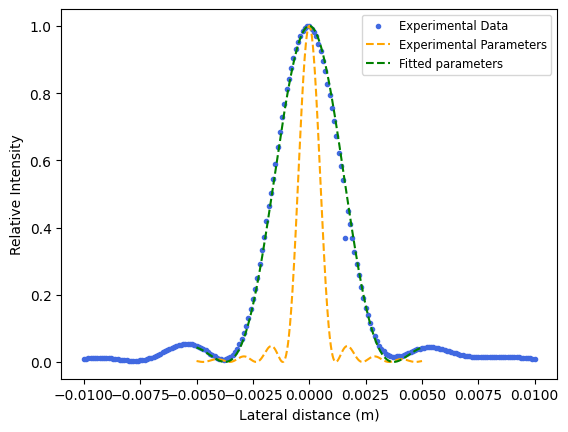

In [104]:
df = pd.read_csv('../Data/0_2mmv2.csv')

W = 0.2e-3

x = (df['x (mm)']/2-10)*10**-3
y = np.array(df['Voltage (mV)']/df['Voltage (mV)'].max())

plt.scatter(
    x,
    y,
    c='royalblue',
    marker='.',
    label = 'Experimental Data'
)

x_smooth = np.linspace(-5e-3,5e-3,1000)

plt.plot(
    x_smooth,
    sinc(x_smooth,0.2),
    c='orange',
    linestyle='--',
    label = 'Experimental Parameters'
)

param, covariance = sp.curve_fit(sinc_fitted,x,y)
y_smooth = sinc_fitted(x_smooth,*param)

perr = np.sqrt(np.diag(covariance))

print(param,perr,perr/param)

plt.plot(
    x_smooth,
    y_smooth,
    label = 'Fitted parameters',
    linestyle = '--',
    c='green'
)

min_exp = argrelextrema(y,np.less,order=5)[0]
x_minexp = x[min_exp]
print(f'Exp:{x_minexp}')

min_fit = argrelextrema(y_smooth,np.less,order=5)[0]
x_minfit = x_smooth[min_fit]
print(f'Fit:{x_minfit}')

plt.legend(loc='upper right',fontsize='small')

plt.xlabel('Lateral distance (m)')
plt.ylabel('Relative Intensity')

plt.savefig('../Figures/0_2mmv2',bbox_inches = 'tight',pad_inches=0.1)
plt.show()

In [86]:
2*np.pi*0.1e-3/632.8e-9 * np.sin(np.arctan(0.00783784/117e-2))

6.651417138367623

In [96]:
np.degrees(np.arctan(0.00783784/117e-2))

0.38381917521971864

In [95]:
np.degrees(np.arctan(0.01570571/117e-2)) 

0.7690742327079827

In [89]:
# Uncertainty analysis
0.025*0.384

0.009600000000000001

In [109]:
np.degrees(632.8e-9/0.4e-3)

0.09064192318969623

In [105]:
np.degrees(np.arctan(0.00373874/1.17))

0.18308828510290848

In [111]:
2*np.pi*0.2e-3/632.8e-9 * np.sin(np.arctan(0.00374/117e-2))

6.347853790846785

In [108]:
np.degrees(np.arctan(0.00198458/117e-2))

0.09718628124256116

In [110]:
2*np.pi*0.4e-3/632.8e-9 * np.sin(np.arctan(0.00198458/117e-2))

6.736828832133813